**Denise Dodd: Solar Energy (Trends, Correlations, Regressions)**

# **Table of Contents**

[Milestone 1](#Milestone_1)

[Milestone 2](#Milestone_2)

[Milestone 3](#Milestone_3)

# **Milestone 1** <a id="Milestone_1"></a>

**Overview**

I currently work for a solar energy company, so I thought it would be interesting to determine if there are any markets to which we might want to expand.  For example, we are currently only located in the United States and its territories.  Is there another country that is also heavily invested in solar energy that clearly has an interest and already has the infrastructure set up?  Is there a country with no solar energy that might require an upfront investment of infrastructure but once that's in place there might be great opportunity?  What other clean energy sources are closely related to solar energy?  Can any of these be good predictors for the future of solar energy?  Should the company start a division to work with hydro or wind energy?  Solar energy was once considered a “fad” or a “trend”.  Can I determine whether solar and clean energy is here to stay or has there been a plateau?  My company is one of the largest solar companies in the United States, but it will be interesting to see if it would be useful to diversify into different countries or different avenues of clean energy. 


**Data**

I will be using a dataset detailing clean energy consumption by country found at Kaggle here: https://www.kaggle.com/datasets/belayethossainds/renewable-energy-world-wide-19652022?select=02+modern-renewable-energy-consumption.csv.  From 1965 to 2021, this dataset details consumption of solar energy, wind energy, hydro energy, and other clean energy for several different countries.  It also details this data for a conglomerate of countries such as continents, income levels, etc. but for this milestone I have removed those rows as you will see in my coding to avoid double reporting.  I'm currently using the energy consumption dataset but as I progress through the project, I might also utilize the energy production dataset associated with the energy consumption set.


**Load Data**

In [1]:
# Import needed modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# Set directory and load data.
os.chdir('C:/Users/hadle/Downloads')
df_with_world = pd.read_csv('02 modern-renewable-energy-consumption.csv')

# Check for accuracy
current_shape = df_with_world.shape
print(f"The current shape of the dataframe is {current_shape}.")
df_with_world

The current shape of the dataframe is (5610, 7).


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.16400,0.00000,0.0000,26.013390
1,Africa,NaN,1972,0.16500,0.00000,0.0000,29.633196
2,Africa,NaN,1973,0.17000,0.00000,0.0000,31.345707
3,Africa,NaN,1974,0.17500,0.00000,0.0000,35.667076
4,Africa,NaN,1975,0.17200,0.00000,0.0000,37.717968
...,...,...,...,...,...,...,...
5605,World,OWID_WRL,2017,596.42050,445.46628,1140.3931,4069.982700
5606,World,OWID_WRL,2018,643.03204,576.23090,1269.9792,4183.166500
5607,World,OWID_WRL,2019,674.74536,703.94977,1420.5441,4231.377000
5608,World,OWID_WRL,2020,703.91644,846.22940,1596.4282,4345.990000


**Data Cleaning**

In [3]:
# Remove the "World" entity from the dataset as I don't want to double dip the data.
df = df_with_world[df_with_world['Entity'] != 'World']

# Check the other "Entity" entries to determine what else needs to be removed.
print(df['Entity'].unique())

# Remove entries that are a conglomerate of countries as I don't want to double dip.
# I later learned that all of the below have null in the "Code" col and it might have been easier to clean that way,
# but I prefer to have them broken out in case later on in the project I'd like to utilize any of these conglomerations.
df = df[~df['Entity'].str.contains(r'\(BP\)')]
df = df[~df['Entity'].str.contains(r'\(27\)')]
df = df[~df['Entity'].str.contains('income')]
df = df[df_with_world['Entity'] != 'USSR']
df = df[df_with_world['Entity'] != 'Europe']
df = df[df_with_world['Entity'] != 'North America']
df = df[df_with_world['Entity'] != 'South America']
df = df[df_with_world['Entity'] != 'Africa']
df = df[df_with_world['Entity'] != 'Oceania']
df = df[df_with_world['Entity'] != 'Asia']

# Check for accuracy
print(f"The previous shape of the dataframe was {current_shape}.")
print(f"The current shape of the dataframe is {df.shape}.")
current_shape = df.shape
df


['Africa' 'Africa (BP)' 'Algeria' 'Argentina' 'Asia' 'Asia Pacific (BP)'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'CIS (BP)' 'Canada' 'Central America (BP)' 'Chile'
 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Eastern Africa (BP)' 'Ecuador' 'Egypt' 'Estonia' 'Europe' 'Europe (BP)'
 'European Union (27)' 'Finland' 'France' 'Germany' 'Greece'
 'High-income countries' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kazakhstan'
 'Kuwait' 'Latvia' 'Lithuania' 'Lower-middle-income countries'
 'Luxembourg' 'Malaysia' 'Mexico' 'Middle Africa (BP)' 'Middle East (BP)'
 'Morocco' 'Netherlands' 'New Zealand' 'Non-OECD (BP)' 'North America'
 'North America (BP)' 'North Macedonia' 'Norway' 'OECD (BP)' 'Oceania'
 'Oman' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Saudi Arabia' 'Singapore' 'Slovakia' 'Slovenia'
 'South Africa' 'South America' 'Sou

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
114,Algeria,DZA,1965,0.000000,0.000000,0.000000,0.400000
115,Algeria,DZA,1966,0.000000,0.000000,0.000000,0.355000
116,Algeria,DZA,1967,0.000000,0.000000,0.000000,0.410000
117,Algeria,DZA,1968,0.000000,0.000000,0.000000,0.563000
118,Algeria,DZA,1969,0.000000,0.000000,0.000000,0.361000
...,...,...,...,...,...,...,...
5491,Vietnam,VNM,2017,0.076454,0.007992,0.350000,87.599000
5492,Vietnam,VNM,2018,0.126210,0.104992,0.487000,84.489000
5493,Vietnam,VNM,2019,0.126210,5.251790,0.722000,66.542000
5494,Vietnam,VNM,2020,0.126210,10.860000,1.073790,73.382000


In [4]:
# Continue data cleaning.

# Find and count null values
null_counts = df.isnull().sum()
print(null_counts)

# I believe these nulls are years when certain energy sectors were not operating in the countries.
# Therefore, replace all nulls with 0 as 0 TWh was being consumed in the countries during those years.
df.fillna(0, inplace=True)

# Check null counts again to confirm there are now 0.
null_counts = df.isnull().sum()
print(null_counts)

Entity                      0
Code                        0
Year                        0
Geo Biomass Other - TWh    50
Solar Generation - TWh     50
Wind Generation - TWh      50
Hydro Generation - TWh      7
dtype: int64
Entity                     0
Code                       0
Year                       0
Geo Biomass Other - TWh    0
Solar Generation - TWh     0
Wind Generation - TWh      0
Hydro Generation - TWh     0
dtype: int64


**Graph 1** - Line Graph (Explanation and Analysis Below Graph)

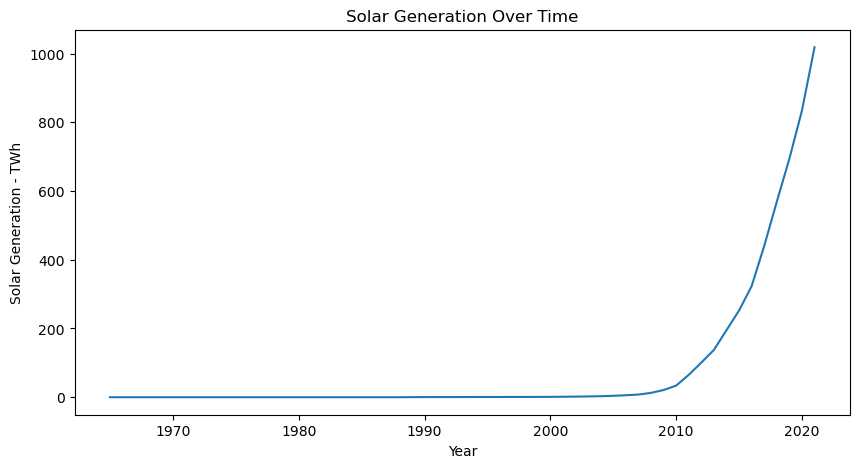

In [5]:
# Use 'groupby' function to get the total Solar consumption per year.
sum_by_year = df.groupby('Year')['Solar Generation - TWh'].sum().reset_index()

# Adjust size to make it twice as long as it is tall.
plt.figure(figsize=(10, 5))

# Plot the yearly consumption of solar energy.
plt.plot(sum_by_year['Year'], sum_by_year['Solar Generation - TWh'])

# Assign axis labels and title.
plt.xlabel('Year')
plt.ylabel('Solar Generation - TWh')
plt.title('Solar Generation Over Time')

# Show the graph
plt.show()

**Graph 1** - Line Graph (Explanation and Analysis)

First, I will make a line graph to determine how solar consumption has changed over time and if there are any trends. Has solar energy started to plateau? Have economic, political, or world matters caused consumption and interest in solar energy to ebb and flow?

Based on the below graph, it appears that solar energy started gaining traction around 2010 and has had a steady increase ever since. There are no signs of plateauing and no ebbs and flows that would mirror world events.

**Graph 2** - Scatter Plot (Explanation and Analysis Below Graph)

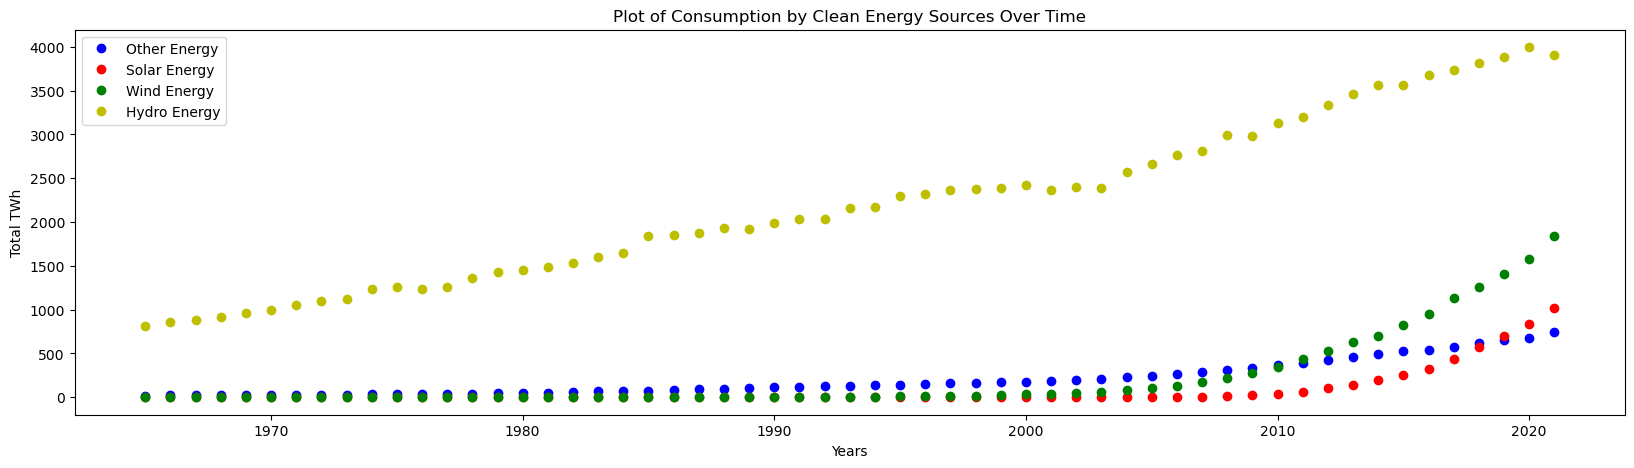

In [6]:
# Similar to the above, use 'groupby' function to find the total TWh consumption per year for each energy sector.
og_sum_by_year = df.groupby('Year')['Geo Biomass Other - TWh'].sum().reset_index()
sg_sum_by_year = df.groupby('Year')['Solar Generation - TWh'].sum().reset_index()
wg_sum_by_year = df.groupby('Year')['Wind Generation - TWh'].sum().reset_index()
hg_sum_by_year = df.groupby('Year')['Hydro Generation - TWh'].sum().reset_index()

# Adjust size to make it four times longer than it is tall.
plt.figure(figsize = (20,5))

# Plot the total consumption per year of each of the different energy sectors.
# Assign a different colored dot for each energy sector and labels.
plt.plot(og_sum_by_year['Year'], og_sum_by_year['Geo Biomass Other - TWh'], 'bo', label = "Other Energy")
plt.plot(sg_sum_by_year['Year'], sg_sum_by_year['Solar Generation - TWh'], 'ro', label = "Solar Energy")
plt.plot(wg_sum_by_year['Year'], wg_sum_by_year['Wind Generation - TWh'], 'go', label = "Wind Energy")
plt.plot(hg_sum_by_year['Year'], hg_sum_by_year['Hydro Generation - TWh'], 'yo', label = "Hydro Energy")

# Add graph title and axis labels.
plt.title("Plot of Consumption by Clean Energy Sources Over Time")
plt.xlabel('Years')
plt.ylabel('Total TWh')

# Display legend.
plt.legend()

# Display graph.
plt.show()

**Graph 2** - Scatter Plot (Explanation and Analysis)

The above graph inspired me to do something similar with all the other energy sources. Do hydro, wind, and other clean energy sources follow a similar steep increase from 2010-2020? Is there a particular energy source that has a similar trajectory as solar?

I was expecting hydro to come out strong in the beginning, but I suspected that it would start to level out as other clean energy sources started to rise. There is a slight dip in hydro energy at the very end, but a steady rise other than that. I'm curious if this is due to the accessibility of hydro energy, the cost, or another factor.

It appears that wind energy and solar energy have a similar trajectory. In future analysis, I'll be interested to see how these variables score on a correlation matrix.

Overall, it appears that as more clean energy is added to the market, it doesn't cannibalize consumption from other energy sectors. Which is great news as we look to diversify into other channels of clean energy.

**Graph 3** - Pie Charts (Explanation and Analysis Below Graph)

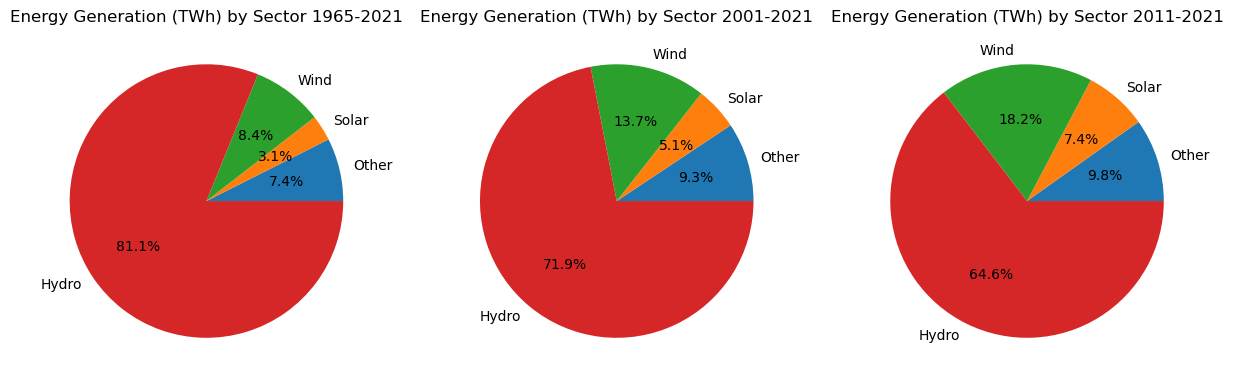

In [7]:
# Assign variables for the sum of all other, solar, wind, and hydro generations over the course of the whole dataset.
og = sum(df['Geo Biomass Other - TWh'])
sg = sum(df['Solar Generation - TWh'])
wg = sum(df['Wind Generation - TWh'])
hg = sum(df['Hydro Generation - TWh'])

# Since some of the sectors of energy are somewhat new, it's not reasonable to include the period of time when they weren't established in many countries.
# Therefore, I created a dataset of the last twenty years of the dataset.
df20 = df[(df['Year'] >= 2001) & (df['Year'] <= 2021)]

# Assign variables for the sum of all other, solar, wind, and hydro generations 
# over the course of the last twenty years of the dataset.
og20 = sum(df20['Geo Biomass Other - TWh'])
sg20 = sum(df20['Solar Generation - TWh'])
wg20 = sum(df20['Wind Generation - TWh'])
hg20 = sum(df20['Hydro Generation - TWh'])

# Based on the above line graph, solar really took off around 2010.
# Therefore, I created a dataset of the last ten years of the dataset.
df10 = df[(df['Year'] >= 2011) & (df['Year'] <= 2021)]

# Assign variables for the sum of all other, solar, wind, and hydro generations
# over the course of the last ten years of the dataset.
og10 = sum(df10['Geo Biomass Other - TWh'])
sg10 = sum(df10['Solar Generation - TWh'])
wg10 = sum(df10['Wind Generation - TWh'])
hg10 = sum(df10['Hydro Generation - TWh'])

# Create label and data variables for the pie charts.
labels1 = ['Other', 'Solar', 'Wind', 'Hydro']
data1 = [og, sg, wg, hg]
labels2 = ['Other', 'Solar', 'Wind', 'Hydro']
data2 = [og20, sg20, wg20, hg20]
labels3 = ['Other', 'Solar', 'Wind', 'Hydro']
data3 = [og10, sg10, wg10, hg10]

# Create a figure with three pie charts (subplots).
# Set figure size so length is 3 times height.
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create first pie chart including title, labels and percentage of the total pie.
axs[0].pie(data1, labels=labels1, autopct='%1.1f%%')
axs[0].set_title('Energy Generation (TWh) by Sector 1965-2021')

# Create second pie chart including title, labels and percentage of the total pie.
axs[1].pie(data2, labels=labels2, autopct='%1.1f%%')
axs[1].set_title('Energy Generation (TWh) by Sector 2001-2021')

# Create third pie chart including title, labels and percentage of the total pie.
axs[2].pie(data3, labels=labels3, autopct='%1.1f%%')
axs[2].set_title('Energy Generation (TWh) by Sector 2011-2021')

# Show the pie charts
plt.show()

**Graph 3** - Pie Charts (Explanation and Analysis)

It's clear that hydro is by far the most popular form of clean energy, but I'm interested in determining how much other sectors contribute to overall clean energy consumption. To accomplish this, I made several pie charts.

The first pie chart covers the entire time frame of our data set. However, I know from the above scatter plot that most sectors did not gain traction until the past 10 or so years. Therefore, I created two additional pie graphs. One pie chart details the final twenty years of the dataset when other clean energy sectors were starting to emerge, and another pie chart detailing the last ten years of the dataset when clean energy really began to take off.

It's interesting to see solar, wind and other energy encroach on hydro's piece of the pie and how the percent allocation has changed over the years. If I hadn't done the above scatterplot, I would worry based on these pie charts that other forms of energy are taking away from hydro energy, when in actuality, the scatter plot shows that while the hydro energy percentage is less of the pie, the TWh consumption is still increasing. I would be hesitant to use these graphs in any official reporting without pairing it with the above scatter plot to show a full picture.

**Graph 4** - Bar Graphs (Explanation and Analysis Below Graph)

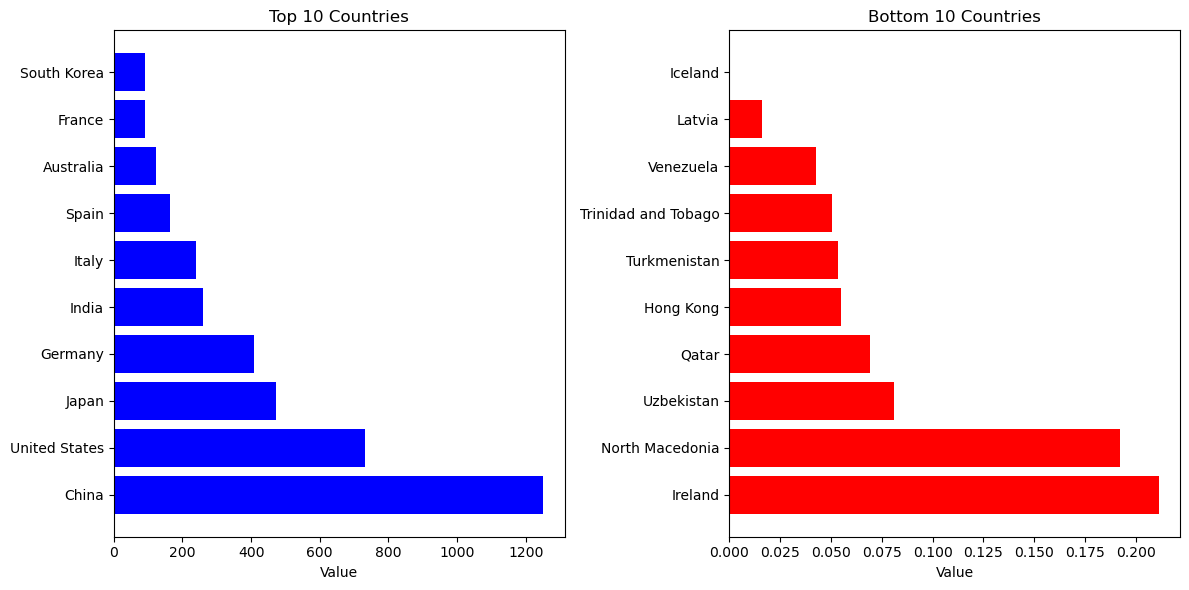

In [8]:
# Calculate the sum of 'Solar Generation - TWh' for each country in the dataframe with data from 2011-2021.
sum_by_country = df10.groupby('Entity')['Solar Generation - TWh'].sum().reset_index()

# Sort the DataFrame by 'Solar Generation - TWh' column in descending order
sum_by_country = sum_by_country.sort_values(by='Solar Generation - TWh', ascending=False)

# Separate the top 10 and bottom 10 solar consuming countries.
top_10 = sum_by_country.head(10)
bottom_10 = sum_by_country.tail(10)

# Set the size for the charts.
plt.figure(figsize=(12, 6))

# Plot the bar chart for the top 10 countries
plt.subplot(1, 2, 1)
plt.barh(top_10['Entity'], top_10['Solar Generation - TWh'], color='blue')
plt.xlabel('Value')
plt.title('Top 10 Countries')

# Plot the bar chart for the bottom 10 countries
plt.subplot(1, 2, 2)
plt.barh(bottom_10['Entity'], bottom_10['Solar Generation - TWh'], color='red')
plt.xlabel('Value')
plt.title('Bottom 10 Countries')

# Adjust layout because initially there was overlap in the charts.
plt.tight_layout()

# Show the bar charts
plt.show()

**Graph 4** - Bar Graphs (Explanation and Analysis)

My final graph will be two bar graphs using data from the last ten years of the dataset.  One will show the solar consumption of the top 10 solar consuming countries and another graph showing the bottom ten solar consuming countries.

The largest solar consuming country, China, also happen to be a very populous country.  I'd be interested to do a study of the solar TWh consumed per person in the top and bottom countries.  I feel this would both smooth the data and provide a better picture of where opportunities lie.  For example, even though China consumes far and away the most solar, if only 5% of the population is using solar and most other countries have 10% using solar, there might be untapped opportunities in China.

These graphs could be good starting points to research new markets.  Iceland likely has low solar consumption due to low production.  Hong Kong is likely in the bottom 10 due to it's small size and population.  But why does Venezuela have low consumption? Is this due to infrastructure?  Lack of direct sunlight?  Population? The list of the bottom 10 countries aren't necessarily slam dunk new markets, but good jumping off points for research to see if they might be viable countries for solar energy.

**Conclusion**

These graphs have been quite helpful in validating that it is a worthwhile task to explore diversifying the company into other markets and other sectors of clean energy.  The line graph shows that solar energy has not reached its peak and the scatter graph showed that wind energy seems to be the most closely aligned with solar energy. I would not recommend exploring hydro energy at this time as the scatterplot shows that it might have reached a point of saturation in the market as its consumption is starting to decline.  The pie charts show the shifting utilization of the different sectors of clean energy over time but can be deceptive if not paired with the scatterplot.  The bar charts showcase the top ten and bottom ten solar consuming countries.  I would be interested to pair these graphs with population data and/or solar production data. I'm eager to pursue this further and take this project from a high-level overview to a more precise analysis.

# **Milestone 2** <a id="Milestone_2"></a>

**Step 1** - Using feedback from the first Milestone, I will add new data with average yearly sunshine hours per country.

This dataset can be found here: https://www.kaggle.com/datasets/prasertk/sunshine-duration-by-city

In [9]:
# Load data.
sunshine_df = pd.read_csv('sunshine hours by city.csv')

# Check for accuracy
sunshine_current_shape = sunshine_df.shape
print(f"The current shape of the dataframe is {sunshine_current_shape}.")
sunshine_df

The current shape of the dataframe is (382, 15).


,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Afghanistan,Kabul,177.2,178.6,204.5,232.5,310.3,353.4,356.8,339.7,303.9,282.6,253.2,182.4,3175.1
1,Albania,Tirana,124.0,125.0,165.0,191.0,263.0,298.0,354.0,327.0,264.0,218.0,127.0,88.0,2544.0
2,Algeria,Algiers,149.0,165.0,202.0,258.0,319.0,318.0,350.0,319.0,237.0,229.0,165.0,136.0,2847.0
3,Algeria,Tamanrasset,297.6,275.5,322.4,327.0,328.6,306.0,356.5,331.7,288.0,310.0,285.0,272.8,3686.0
4,Angola,Luanda,219.0,208.0,213.0,199.0,233.0,223.0,175.0,150.0,145.0,164.0,199.0,212.0,2341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Zambia,Livingstone,213.9,196.0,251.1,273.0,303.8,288.0,310.0,319.3,297.0,279.0,228.0,207.7,3166.8
378,Zambia,Lusaka,176.7,168.0,220.1,246.0,275.9,270.0,294.5,303.8,291.0,272.8,234.0,182.9,2935.7
379,Zambia,Ndola,151.9,142.8,192.2,243.0,279.0,276.0,297.6,297.6,279.0,269.7,207.0,158.1,2793.9
380,Zimbabwe,Bulawayo,244.9,212.8,251.1,252.0,279.0,267.0,288.3,300.7,288.0,272.8,237.0,226.3,3119.9


In [10]:
# Because there are rows for various cities and many countries have more than one city represented,
# use groupby to find the mean yearly sunshine hours per country.
# Use reset_index so I can access all cols in a dataframe.
average_year_per_country = sunshine_df.groupby('Country')['Year'].mean().reset_index()

# Check for accuracy
sunshine_avg_current_shape = average_year_per_country.shape
print(f"The current shape of the dataframe is {sunshine_avg_current_shape}.")
average_year_per_country

The current shape of the dataframe is (140, 2).


,Country,Year
0,Afghanistan,3175.100000
1,Albania,2544.000000
2,Algeria,3266.500000
3,Angola,2341.000000
4,Argentina,2220.300000
...,...,...
135,Uzbekistan,2823.900000
136,Venezuela,2895.300000
137,Vietnam,2123.500000
138,Zambia,2965.466667


In [11]:
# Create a new df by performing an inner join on 'Entity' in 'df' and 'Country' in 'sunshine_df'.
merged_df = pd.merge(df, average_year_per_country, left_on='Entity', right_on='Country', how='inner')

# Check for accuracy
merged_df_shape = merged_df.shape
print(f"The current shape of the dataframe is {merged_df_shape}.")
merged_df

The current shape of the dataframe is (3729, 9).


,Entity,Code,Year_x,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Country,Year_y
0,Algeria,DZA,1965,0.000000,0.000000,0.000000,0.400000,Algeria,3266.5
1,Algeria,DZA,1966,0.000000,0.000000,0.000000,0.355000,Algeria,3266.5
2,Algeria,DZA,1967,0.000000,0.000000,0.000000,0.410000,Algeria,3266.5
3,Algeria,DZA,1968,0.000000,0.000000,0.000000,0.563000,Algeria,3266.5
4,Algeria,DZA,1969,0.000000,0.000000,0.000000,0.361000,Algeria,3266.5
...,...,...,...,...,...,...,...,...,...
3724,Vietnam,VNM,2017,0.076454,0.007992,0.350000,87.599000,Vietnam,2123.5
3725,Vietnam,VNM,2018,0.126210,0.104992,0.487000,84.489000,Vietnam,2123.5
3726,Vietnam,VNM,2019,0.126210,5.251790,0.722000,66.542000,Vietnam,2123.5
3727,Vietnam,VNM,2020,0.126210,10.860000,1.073790,73.382000,Vietnam,2123.5


**Step 2** - Check for nulls. To ensure accuracy.

In [12]:
# Find all the nulls in the dataframe.
null_values = merged_df.isnull()

# Sum the number of nulls in each col.
null_count = null_values.sum()

# Print the number of nulls per col.
print(null_count)

Entity                     0
Code                       0
Year_x                     0
Geo Biomass Other - TWh    0
Solar Generation - TWh     0
Wind Generation - TWh      0
Hydro Generation - TWh     0
Country                    0
Year_y                     0
dtype: int64


**Step 3** - Drop columns. Because of the merge, there are now repetitive columns that will be dropped.

In [13]:
# Drop Country col from dataframe.
merged_df = merged_df.drop('Country', axis=1)

# I will also drop Code to prevent multicollinearity with the Entity col.
merged_df = merged_df.drop('Code', axis=1)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{merged_df_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{merged_df.shape}")

# Update the shape variable.
current_shape = merged_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
merged_df

The shape of the previous dataframe was:
(3729, 9)
The shape of the new dataframe is:
(3729, 7)

Preview dataframe to check for accuracy:



,Entity,Year_x,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Year_y
0,Algeria,1965,0.000000,0.000000,0.000000,0.400000,3266.5
1,Algeria,1966,0.000000,0.000000,0.000000,0.355000,3266.5
2,Algeria,1967,0.000000,0.000000,0.000000,0.410000,3266.5
3,Algeria,1968,0.000000,0.000000,0.000000,0.563000,3266.5
4,Algeria,1969,0.000000,0.000000,0.000000,0.361000,3266.5
...,...,...,...,...,...,...,...
3724,Vietnam,2017,0.076454,0.007992,0.350000,87.599000,2123.5
3725,Vietnam,2018,0.126210,0.104992,0.487000,84.489000,2123.5
3726,Vietnam,2019,0.126210,5.251790,0.722000,66.542000,2123.5
3727,Vietnam,2020,0.126210,10.860000,1.073790,73.382000,2123.5


**Step 4** - Rename columns. Specifically, rename the "Entity", "Year_x", and Year_y" cols.

In [14]:
# Define a list of new column names
column_names = ['Country', 'Year', 'Geo Biomass Other - TWh', 'Solar Generation - TWh', 'Wind Generation - TWh', 
                'Hydro Generation - TWh', 'Avg_Yearly_Sun(Hrs)']

# Assign the new column names to the dataFrame
merged_df.columns = column_names

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{merged_df_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{merged_df.shape}")

# Update the shape variable.
current_shape = merged_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
merged_df

The shape of the previous dataframe was:
(3729, 9)
The shape of the new dataframe is:
(3729, 7)

Preview dataframe to check for accuracy:



,Country,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Avg_Yearly_Sun(Hrs)
0,Algeria,1965,0.000000,0.000000,0.000000,0.400000,3266.5
1,Algeria,1966,0.000000,0.000000,0.000000,0.355000,3266.5
2,Algeria,1967,0.000000,0.000000,0.000000,0.410000,3266.5
3,Algeria,1968,0.000000,0.000000,0.000000,0.563000,3266.5
4,Algeria,1969,0.000000,0.000000,0.000000,0.361000,3266.5
...,...,...,...,...,...,...,...
3724,Vietnam,2017,0.076454,0.007992,0.350000,87.599000,2123.5
3725,Vietnam,2018,0.126210,0.104992,0.487000,84.489000,2123.5
3726,Vietnam,2019,0.126210,5.251790,0.722000,66.542000,2123.5
3727,Vietnam,2020,0.126210,10.860000,1.073790,73.382000,2123.5


**Step 5** - Drop rows.  I learned in Milestone 1 that the usage of clean energy has changed over time as different forms of clean energy become more manageable. Therefore, I will drop all rows prior to 2011.  This will allow me to explore the most recent 10 years of data that is available to have current information.

In [15]:
# Keep rows where Year is greater than or equal to 2011.
merged_df = merged_df.loc[merged_df['Year'] >= 2011]

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{merged_df_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{merged_df.shape}")

# Update the shape variable.
current_shape = merged_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
merged_df

The shape of the previous dataframe was:
(3729, 9)
The shape of the new dataframe is:
(770, 7)

Preview dataframe to check for accuracy:



,Country,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Avg_Yearly_Sun(Hrs)
46,Algeria,2011,0.000000,0.018119,0.000000,0.378000,3266.5
47,Algeria,2012,0.000000,0.026723,0.000000,0.389000,3266.5
48,Algeria,2013,0.000000,0.028600,0.000000,0.099000,3266.5
49,Algeria,2014,0.000000,0.060000,0.001000,0.193000,3266.5
50,Algeria,2015,0.000000,0.058000,0.019000,0.145000,3266.5
...,...,...,...,...,...,...,...
3724,Vietnam,2017,0.076454,0.007992,0.350000,87.599000,2123.5
3725,Vietnam,2018,0.126210,0.104992,0.487000,84.489000,2123.5
3726,Vietnam,2019,0.126210,5.251790,0.722000,66.542000,2123.5
3727,Vietnam,2020,0.126210,10.860000,1.073790,73.382000,2123.5


**Step 6** - Create correlation matrix.  This isn't so much a transformation, but before I make dummy variables I would like to get an idea of how the original variables are correlated.  This will be helpful in Milestone 3 when determining a regression model.

In [16]:
# Create correlation matrix of entire dataframe.
merged_df.corr()

,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Avg_Yearly_Sun(Hrs)
Year,1.000000e+00,0.089656,0.183939,0.122239,0.021614,-9.284958e-15
Geo Biomass Other - TWh,8.965592e-02,1.000000,0.790165,0.869896,0.694347,-9.989743e-02
Solar Generation - TWh,1.839389e-01,0.790165,1.000000,0.899925,0.643077,-2.103263e-02
Wind Generation - TWh,1.222394e-01,0.869896,0.899925,1.000000,0.742122,-1.040472e-02
Hydro Generation - TWh,2.161420e-02,0.694347,0.643077,0.742122,1.000000,-7.171316e-02
Avg_Yearly_Sun(Hrs),-9.284958e-15,-0.099897,-0.021033,-0.010405,-0.071713,1.000000e+00


**Step 7** - Make dummy variables Country col.  Because this will create so many additional cols, I considered making a dataframe with the top 10 countries including variables and the bottom 10 countries including variables, but it turns out that even though it creates a large dataframe, the system was able to execute and calculate within this dataframe without issues so I kept one large dataframe with dummy variables for all countries.

In [17]:
# Create dummy variables for country cols.
# Drop first dummy variable to prevent multicollinearity.
merged_df = pd.get_dummies(merged_df, columns=['Country'], prefix='Country', drop_first=True)

#--------Below coding is the same for all transformations to check accuracy--------#
# Check shape of dataframe.
print(f"\033[1mThe shape of the previous dataframe was:\n\033[0m{merged_df_shape}")
print(f"\033[1mThe shape of the new dataframe is:\n\033[0m{merged_df.shape}")

# Update the shape variable.
current_shape = merged_df.shape

# Print dataframe to check for accuracy.
print("\033[1m\nPreview dataframe to check for accuracy:\n\033[0m")
merged_df

The shape of the previous dataframe was:
(3729, 9)
The shape of the new dataframe is:
(770, 75)

Preview dataframe to check for accuracy:



,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Avg_Yearly_Sun(Hrs),Country_Argentina,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_Switzerland,Country_Taiwan,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Uzbekistan,Country_Venezuela,Country_Vietnam
46,2011,0.000000,0.018119,0.000000,0.378000,3266.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,2012,0.000000,0.026723,0.000000,0.389000,3266.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,2013,0.000000,0.028600,0.000000,0.099000,3266.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,2014,0.000000,0.060000,0.001000,0.193000,3266.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,2015,0.000000,0.058000,0.019000,0.145000,3266.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,2017,0.076454,0.007992,0.350000,87.599000,2123.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3725,2018,0.126210,0.104992,0.487000,84.489000,2123.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3726,2019,0.126210,5.251790,0.722000,66.542000,2123.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3727,2020,0.126210,10.860000,1.073790,73.382000,2123.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Conclusion**

In response to feedback from Milestone 1, I found a dataset detailing the yearly sun hours in each country.  This will be useful data as it will be a larger, less effective undertaking to generate solar energy in a country with low sun hours.  I merged this data frame with the original data frame and checked for nulls to confirm that all countries in the original dataframe were present in the sun hours data frame and the join was successful.

I then removed unnecessary cols and rows as well as renamed the remaining columns to make this a more manageable dataframe.

Before making dummy variables, I made a correlation matrix just to gain a better understanding of the data.

My final step was to make dummy variables out of the country col.  This created 67 dummy variables which I was concerned was too many and might cause multicollinearity even though I dropped one of the dummies.  However, I plan to use Ridge Regression as on of my models in Milestone 3 which is suppose to take into account possible multicollinearity so hopefully this won't be an issue.

# **Milestone 3** <a id="Milestone_3"></a>

In [18]:
# Import needed modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Solar Generation**

My company currently provides solar energy to the United States. The primary question of this project is **<span style="color: blue;">"are there other countries that my company could branch out to that would be optimal countries for providing solar energy."</span>** I will review the metrics of the below linear and ridge regressions to determine if these models will provide good predictions of countries that will have high solar consumption and therefore would be viable for a solar energy company.

*I will analyze the models and associated metrics in the conclusion portion of this milestone.*

**Solar Generation - Linear Regression**

My first regression will be a linear regression using Solar Generation - TWh as the target variable.  Based on the graphs in milestone 1, it appears that Solar Generation has a close to linear relationship with several other variables, so this seems to be a good regression choice.  If this proves to be a good fit, this can be used to predict which countries have the potential to be future high solar generating countries.

In [19]:
# Split the data into features variables (all columns except Solar Generation - TWh) and target variables (Solar Generation - TWh col).
solar_features = merged_df.drop('Solar Generation - TWh', axis=1)
solar_target = merged_df['Solar Generation - TWh']

# Split the data into training and test sets using an 80/20 split and a random state of 42 for continuity.
solar_features_train, solar_features_test, solar_target_train, solar_target_test = train_test_split(solar_features, solar_target, test_size=0.2, random_state=42)

In [20]:
# Assign variable to LinearRegression.
solar_ols = LinearRegression()

# Fit linear regression model using the training variables assigned above.
solar_ols.fit(solar_features_train, solar_target_train)

# Use the linear regression model to make a prediction variable for Solar Generation - TWh based on the features test variable.
solar_target_pred = solar_ols.predict(solar_features_test)

# Calculate and print metrics.
solar_linear_r2 = r2_score(solar_target_test, solar_target_pred)
solar_linear_rmse = np.sqrt(mean_squared_error(solar_target_test, solar_target_pred))
solar_linear_mae = mean_absolute_error(solar_target_test, solar_target_pred)

print(f"R-squared (R^2): {round(solar_linear_r2,2)}")
print(f"Root Mean Squared Error (RMSE): {round(solar_linear_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(solar_linear_mae,2)}")

R-squared (R^2): 0.88
Root Mean Squared Error (RMSE): 6.03
Mean Absolute Error (MAE): 2.65


**Solar Generation - Ridge Regression**

The Linear Regression appears to be a good fit, but just to exercise caution I will also run a Ridge Regression.  Ridge Regression has the capability of better handling multicollinearity and overfitting.  Because there are so many dummy variables and some of the numerical variables appear to be closely related, Ridge Regression will take this into account and be a good check on the above Linear Regression.

In [21]:
# Create a Ridge regression model.
solar_ridge = Ridge()

# Fit the Ridge regression model using the training variables assigned above.
solar_ridge.fit(solar_features_train, solar_target_train)

# Use the Ridge regression model to make predictions for Solar Generation - TWh based on the features test variable.
solar_target_pred = solar_ridge.predict(solar_features_test)

# Calculate and print metrics.
solar_ridge_r2 = r2_score(solar_target_test, solar_target_pred)
solar_ridge_rmse = np.sqrt(mean_squared_error(solar_target_test, solar_target_pred))
solar_ridge_mae = mean_absolute_error(solar_target_test, solar_target_pred)

print(f"R-squared (R^2): {round(solar_ridge_r2, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(solar_ridge_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(solar_ridge_mae, 2)}")

R-squared (R^2): 0.89
Root Mean Squared Error (RMSE): 5.86
Mean Absolute Error (MAE): 2.78


**Solar Generation - Top 5 Countries**

I wanted to see the tangible results of the Ridge Regression since it proved to be the most accurate model. My goal was to print a list of the top 5 predicted solar generating countries.

After much googling and trial and error, I found that the best way to accomplish this is to put the model in a loop and run the regression for each country individually.

In [22]:
# Create an empty dictionary to store the top 5 countries.
top_solar_countries = {}

# Use a for loop to iterate over each country in the dateframe.
# Because I used the prefix "Country_" when creating my dummy variables, I used this to identify columns associated with countries.
for column in merged_df.columns:
    if column.startswith('Country_'):
        # Remove prefix from col name so I have a clean country name when storing countries in the dictionary.
        country_name = column.replace('Country_', '')

        # Select the features and target variable for the current country.
        solar_features = merged_df[['Year', 'Geo Biomass Other - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh', 'Avg_Yearly_Sun(Hrs)', column]]
        solar_target = merged_df['Solar Generation - TWh']

        # Data splitting, creating and fitting model, and running predictions are the same as in the above Ridge Regression coding..
        solar_features_train, solar_features_test, solar_target_train, solar_target_test = train_test_split(solar_features, solar_target, test_size=0.2, random_state=42)
        solar_ridge = Ridge()
        solar_ridge.fit(solar_features_train, solar_target_train)
        predicted_solar_gen = solar_ridge.predict(solar_features_test)

        # Store country name and maximum predicted solar generation in top countries dictionary.
        top_solar_countries[country_name] = max(predicted_solar_gen)

# Use temporary lambda function to sort top counties dictionary by the second value which is the Twh value.
# Sort the data highest to lowest and extract the top 5 items.
top_5_solar_countries = sorted(top_solar_countries.items(), key=lambda x: x[1], reverse=True)[:5]

# Create dataframe out of dictionary for ease of viewing.
# Assign col names to dataframe.
top_5_solar_countries_df = pd.DataFrame(top_5_solar_countries)
top_5_solar_countries_df.columns = ["Country", "Predicted Solar TWh"]
top_5_solar_countries_df  

,Country,Predicted Solar TWh
0,Japan,170.230103
1,Spain,165.012284
2,United Kingdom,164.738244
3,Italy,164.678260
4,Germany,164.162328


**Wind Generation**

The second question that I hoped to answer in this assignment is **<span style="color: blue;">"are there other channels of clean energy into which my company could diversify?"</span>**  Based on the graphs in Milestone 1 and the correlation matrix in Milestone 2, it appears that wind energy is closely related to solar energy and the two channels do not cannibalize each other.  As a reminder, below is the correlation coefficient for solar and wind generation which shows a very strong correlation.

In [23]:
# Calculate correlation of solar and wind generation.
correlation = merged_df['Solar Generation - TWh'].corr(merged_df['Wind Generation - TWh'])
print(f"Correlation between Solar Generation and Wind Generation: {correlation}")


Correlation between Solar Generation and Wind Generation: 0.8999250576947417


**Wind Generation - Linear Regression**

Similar to the above Solar Generation Linear Regression, I am hopeful that this proves to be a good fit and can be used to predict which countries have the potential to be future high wind generating countries.

In [24]:
# Split the data into features variables (all columns except Solar Generation - TWh) and target variables (Solar Generation - TWh col).
wind_features = merged_df.drop('Wind Generation - TWh', axis=1)
wind_target = merged_df['Wind Generation - TWh']

# Split the data into training and test sets using an 80/20 split and a random state of 42 for continuity.
wind_features_train, wind_features_test, wind_target_train, wind_target_test = train_test_split(wind_features, wind_target, test_size=0.2, random_state=42)

In [25]:
# Assign variable to LinearRegression.
wind_ols = LinearRegression()

# Fit linear regression model using the training variables assigned above.
wind_ols.fit(wind_features_train, wind_target_train)

# Use the linear regression model to make a prediction variable for Solar Generation - TWh based on the features test variable.
wind_target_pred = wind_ols.predict(wind_features_test)

# Calculate and print metrics.
wind_linear_r2 = r2_score(wind_target_test, wind_target_pred)
wind_linear_rmse = np.sqrt(mean_squared_error(wind_target_test, wind_target_pred))
wind_linear_mae = mean_absolute_error(wind_target_test, wind_target_pred)

print(f"R-squared (R^2): {round(wind_linear_r2,2)}")
print(f"Root Mean Squared Error (RMSE): {round(wind_linear_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(wind_linear_mae,2)}")

R-squared (R^2): 0.95
Root Mean Squared Error (RMSE): 10.2
Mean Absolute Error (MAE): 4.04


**Wind Generation- Ridge Regression**

Again, similar to the ridge regression for solar generation, I want to compliment my wind generation linear regression model by running a ridge regression to account for multicollinearity and overfitting.

In [26]:
# Create a Ridge regression model.
wind_ridge = Ridge()

# Fit the Ridge regression model using the training variables assigned above.
wind_ridge.fit(wind_features_train, wind_target_train)

# Use the Ridge regression model to make predictions for Solar Generation - TWh based on the features test variable.
wind_target_pred = wind_ridge.predict(wind_features_test)

# Calculate and print metrics.
wind_ridge_r2 = r2_score(wind_target_test, wind_target_pred)
wind_ridge_rmse = np.sqrt(mean_squared_error(wind_target_test, wind_target_pred))
wind_ridge_mae = mean_absolute_error(wind_target_test, wind_target_pred)

print(f"R-squared (R^2): {round(wind_ridge_r2, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(wind_ridge_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(wind_ridge_mae, 2)}")

R-squared (R^2): 0.95
Root Mean Squared Error (RMSE): 9.6
Mean Absolute Error (MAE): 3.91


**Wind Generation - Top 5 Countries**

Similar to what I did above with solar generation, I'm going to find the top five predicted wind generating countries.

In [27]:
# Create an empty dictionary to store the top 5 countries.
top_wind_countries = {}

# Use a for loop to iterate over each country in the dateframe.
# Because I used the prefix "Country_" when creating my dummy variables, I used this to identify columns associated with countries.
for column in merged_df.columns:
    if column.startswith('Country_'):
        # Remove prefix from col name so I have a clean country name when storing countries in the dictionary.
        country_name = column.replace('Country_', '')
        
        # Select the features and target variable for the current country.
        wind_features = merged_df[['Year', 'Geo Biomass Other - TWh', 'Solar Generation - TWh', 'Hydro Generation - TWh', 'Avg_Yearly_Sun(Hrs)', column]]
        wind_target = merged_df['Wind Generation - TWh']

        # Data splitting, creating and fitting model, and running predictions are the same as in the above Ridge Regression coding..
        wind_features_train, wind_features_test, wind_target_train, wind_target_test = train_test_split(wind_features, wind_target, test_size=0.2, random_state=42)
        wind_ridge = Ridge()
        wind_ridge.fit(wind_features_train, wind_target_train)
        predicted_wind_gen = wind_ridge.predict(wind_features_test)

        # Store country name and maximum predicted wind generation in top countries dictionary.
        top_wind_countries[country_name] = max(predicted_wind_gen)

# Use temporary lambda function to sort top counties dictionary by the second value which is the Twh value.
# Sort the data highest to lowest and extract the top 5 items.
top_5_wind_countries = sorted(top_wind_countries.items(), key=lambda x: x[1], reverse=True)[:5]

# Create dataframe out of dictionary for ease of viewing.
# Assign col names to dataframe.
top_5_wind_countries_df = pd.DataFrame(top_5_wind_countries)
top_5_wind_countries_df.columns = ["Country", "Predicted Wind TWh"]
top_5_wind_countries_df  

,Country,Predicted Wind TWh
0,United States,345.942446
1,Japan,295.863387
2,Italy,284.035542
3,India,281.293638
4,South Korea,281.281791


**Conclusion**

In [28]:
print("\033[1mSummary of Metrics:\033[0m")

print("\n\033[1mSolar Linear Regression\033[0m")
print(f"R-squared (R^2): {round(solar_linear_r2,2)}")
print(f"Root Mean Squared Error (RMSE): {round(solar_linear_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(solar_linear_mae,2)}")

print("\n\033[1mSolar Ridge Regression\033[0m")
print(f"R-squared (R^2): {round(solar_ridge_r2, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(solar_ridge_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(solar_ridge_mae, 2)}")

print("\n\033[1mSolar Ridge Top 5 Countries\033[0m")
top_5_solar_countries_df

Summary of Metrics:

Solar Linear Regression
R-squared (R^2): 0.88
Root Mean Squared Error (RMSE): 6.03
Mean Absolute Error (MAE): 2.65

Solar Ridge Regression
R-squared (R^2): 0.89
Root Mean Squared Error (RMSE): 5.86
Mean Absolute Error (MAE): 2.78

Solar Ridge Top 5 Countries


,Country,Predicted Solar TWh
0,Japan,170.230103
1,Spain,165.012284
2,United Kingdom,164.738244
3,Italy,164.678260
4,Germany,164.162328


In [29]:
print("\n\033[1mWind Linear Regression\033[0m")
print(f"R-squared (R^2): {round(wind_linear_r2,2)}")
print(f"Root Mean Squared Error (RMSE): {round(wind_linear_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(wind_linear_mae,2)}")

print("\n\033[1mWind Ridge Regression\033[0m")
print(f"R-squared (R^2): {round(wind_ridge_r2, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(wind_ridge_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(wind_ridge_mae, 2)}")

print("\n\033[1mWind Ridge Top 5 Countries\033[0m")
top_5_wind_countries_df


Wind Linear Regression
R-squared (R^2): 0.95
Root Mean Squared Error (RMSE): 10.2
Mean Absolute Error (MAE): 4.04

Wind Ridge Regression
R-squared (R^2): 0.95
Root Mean Squared Error (RMSE): 9.6
Mean Absolute Error (MAE): 3.91

Wind Ridge Top 5 Countries


,Country,Predicted Wind TWh
0,United States,345.942446
1,Japan,295.863387
2,Italy,284.035542
3,India,281.293638
4,South Korea,281.281791


**Solar Metrics**

R-Squared measures how well variance in the target variable is explained by the features variables. Both have high R-Squares close to 1, but the Ridge Regression model is just slightly higher meaning that it explains the variance the slightest bit more.

The lower the Root Mean Squared Error, the more accurate the model is. Both models have a low RMSE but the Ridge Regression has a lower RMSE.

The MAE represents the average errors. The linear regression has a lower MAE and therefore is anticipated to have less errors.
Overall, both models show efficiency in making predictions on Solar Generation, but the Ridge Regression appears to be slightly more accurate. This is not surprising as the Ridge Regression considers multicollinearity and overfitting which can be a hazard with this dataset.

**Wind Metrics**

The R-Squared for both the Liner and Ridge Regression is a very high .95. This tells me that almost all the variance in Wind Generation can be explained by the other variables present in the dataset.

The Ridge Regression was a slightly lower RMSE telling me that it's predictions deviate less from the actual values than the linear model's prediction.

The MAE represents the average errors. The linear regression has a lower MAE and therefore is anticipated to have less errors.
Overall, both models show efficiency in making predictions on Solar Generation, but the Ridge Regression appears to be slightly more accurate. This is not surprising as the Ridge Regression considers multicollinearity and overfitting which can be a hazard with this dataset.

**Top 5 Findings**

The top 5 solar countries and the top five wind generating countries both include Japan and Italy.  These could be viable territories to research if my company wishes to expand to other countries.

**Conclusion**

To answer the first question posed in this research **<span style="color: blue;">"are there other countries that my company could branch out to that would be optimal countries for providing solar energy."</span>** the top five listed solar consuming countries would be good candidates for additional research.

In response to the second question, **<span style="color: blue;">"are there other channels of clean energy into which my company could diversify?"</span>** Wind Energy appears to be a useful channel for my company to diversify into.  I have also identified the top 5 Wind consuming countries as viable options.